# Repaso NN

https://colab.research.google.com/drive/1Hnc5rzfl66Bl_YHZHLSAqhQS81x9kgmp?usp=sharing#scrollTo=d6o_SXFt5NE9

In [ ]:
from keras.datasets import cifar10

((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0
trainX = trainX.reshape((trainX.shape[0], 3072))
testX = testX.reshape((testX.shape[0], 3072))

In [ ]:
trainX[0].shape

(3072,)

<function matplotlib.pyplot.show(close=None, block=None)>

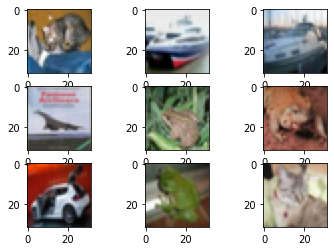

In [ ]:
import matplotlib.pyplot as plt 
for i in range(9):
  plt.subplot(330 + i + 1)
  plt.imshow(testX[i].reshape(32,32,3) )
plt.show

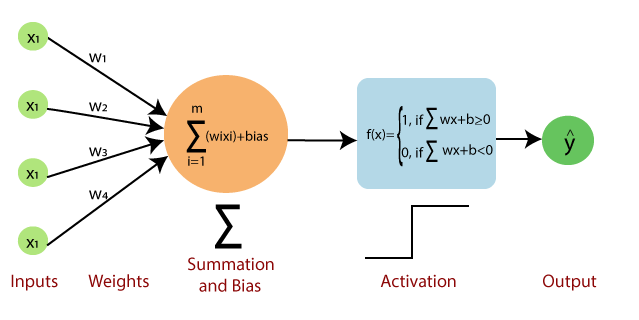

In [ ]:
print(testY)

[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


# 1
https://colab.research.google.com/drive/1Hnc5rzfl66Bl_YHZHLSAqhQS81x9kgmp#scrollTo=aL0XHNE4Rxpv

In [ ]:
from keras.utils import to_categorical

testY = to_categorical(testY)
trainY = to_categorical(trainY)

In [ ]:
print(testY)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation

model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1024)              3146752   
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 3,676,682
Trainable params: 3,676,682
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.optimizers import SGD

sgd = SGD(0.01)

model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])

In [ ]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=20, batch_size=32) 

Epoch 1/20
1563/1563 [==============================] - 25s 16ms/step - loss: 1.8381 - accuracy: 0.3441 - val_loss: 1.7350 - val_accuracy: 0.3774
Epoch 2/20
1563/1563 [==============================] - 24s 15ms/step - loss: 1.6482 - accuracy: 0.4175 - val_loss: 1.7402 - val_accuracy: 0.3727
Epoch 3/20
1563/1563 [==============================] - 24s 15ms/step - loss: 1.5679 - accuracy: 0.4464 - val_loss: 1.6096 - val_accuracy: 0.4271
Epoch 4/20
1563/1563 [==============================] - 24s 15ms/step - loss: 1.5085 - accuracy: 0.4666 - val_loss: 1.5196 - val_accuracy: 0.4614
Epoch 5/20
1563/1563 [==============================] - 24s 15ms/step - loss: 1.4615 - accuracy: 0.4853 - val_loss: 1.5390 - val_accuracy: 0.4517
Epoch 6/20
1563/1563 [==============================] - 24s 15ms/step - loss: 1.4202 - accuracy: 0.5006 - val_loss: 1.4756 - val_accuracy: 0.4781
Epoch 7/20
1563/1563 [==============================] - 24s 15ms/step - loss: 1.3840 - accuracy: 0.5123 - val_loss: 1.5039 -

# Torch

In [ ]:
import torch
import torch.nn as nn

model = nn.Sequential(nn.Linear(3072, 1024),
                      nn.ReLU(),
                      nn.Linear(1024, 512),
                      nn.ReLU(),
                      nn.Linear(512, 10),
                      nn.Softmax())
print(model)

Sequential(
  (0): Linear(in_features=3072, out_features=1024, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1024, out_features=512, bias=True)
  (3): ReLU()
  (4): Linear(in_features=512, out_features=10, bias=True)
  (5): Softmax(dim=None)
)


In [ ]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

losses = []
for epoch in range(20):
    pred_y = model(torch.Tensor(trainX))
    loss = loss_function(pred_y, , 10))
    losses.append(loss.item())

    model.zero_grad()
    loss.backward()

    optimizer.step()

In [ ]:
torch.nn.functional.one_hot(torch.Tensor(trainY)).squeeze()